# Image Classification using Fashion-MNIST image data

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

2.12.0


## Load image data

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

https://www.tensorflow.org/datasets/catalog/fashion_mnist

https://github.com/zalandoresearch/fashion-mnist

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Pixel values are between 0 and 255, 0 being black and 255 white (grey-scale image).

Check the loaded data - Image

In [3]:
print(train_images.shape)
print(train_images[0,:])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

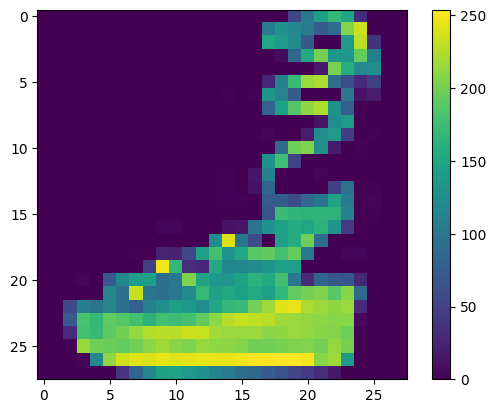

In [4]:
plt.figure()
plt.imshow(train_images[36])
plt.colorbar()
plt.grid(False)
plt.show()

Labels are integers from 0 to 9.  Each represents a specific article of clothing.

Check the loaded data - Label

In [5]:
train_labels[:12]  # First 12 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

Define class names

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Preprocessing

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Reshape the array to 4-dims so that it can work with the Keras API
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

## Build the Model

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(6, kernel_size=(5,5), padding='same', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(16, kernel_size=(5,5)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

## Compile the Model

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [15]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0803 - accuracy: 0.9689
Epoch 2/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0741 - accuracy: 0.9714
Epoch 3/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0752 - accuracy: 0.9711
Epoch 4/30
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0748 - accuracy: 0.9720
Epoch 5/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0735 - accuracy: 0.9714
Epoch 6/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0680 - accuracy: 0.9743
Epoch 7/30
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0678 - accuracy: 0.9740
Epoch 8/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0654 - accuracy: 0.9755
Epoch 9/30
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0634 - accuracy: 0.9757
Epoch 10/30
1875/1875 [==============================] - 32s 17m

## Evaluate the Model

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.8434 - accuracy: 0.8979
Test Accuracy: 0.8978999853134155


## Make a Prediction

313/313 [==============================] - 3s 9ms/step
[[6.1884959e-24 0.0000000e+00 1.1559864e-31 ... 1.2996134e-13
  6.1544270e-25 9.9999994e-01]
 [4.5540217e-29 0.0000000e+00 9.9999994e-01 ... 0.0000000e+00
  4.5012117e-34 0.0000000e+00]
 [0.0000000e+00 9.9999994e-01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [2.8427842e-16 0.0000000e+00 5.9557302e-25 ... 0.0000000e+00
  9.9999994e-01 0.0000000e+00]
 [0.0000000e+00 9.9999994e-01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [7.8251267e-20 0.0000000e+00 1.3448058e-22 ... 2.5276538e-08
  1.9233690e-17 5.8035222e-22]]
6
Shirt


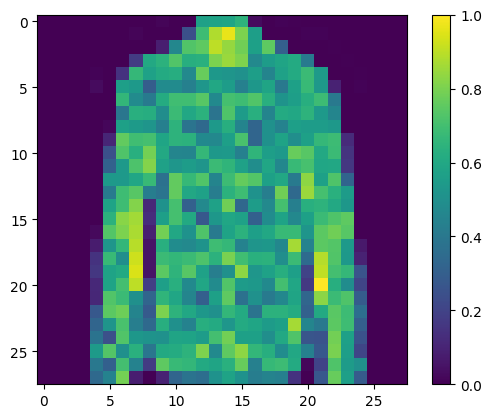

In [17]:
predictions = model.predict(test_images)
print(predictions)
# predictions = model.predict([test_images[0]])

print(np.argmax(predictions[101]))
print(class_names[np.argmax(predictions[101])])

plt.figure()
plt.imshow(test_images[101].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

Choose a number: 55
1/1 [==============================] - 0s 20ms/step


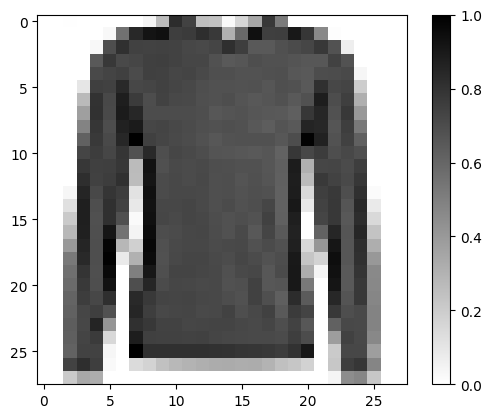

Correct label: Pullover
Guessed label: Pullover


In [18]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR 

def show_image(img, label, guess):
  img = img.reshape(28,28)
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  # plt.title("Corrected label: " + label)
  # plt.xlabel("Guessed label: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Correct label: " + label)
  print("Guessed label: " + guess)

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)

def get_number():
  while True:
    num = input("Choose a number: ")
    if num.isdigit():
      num = int(num)
      if 0<=num<=1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)